# About

[Triqler](https://pubmed.ncbi.nlm.nih.gov/30482846/) is a novel software for protein quantification and differential protein identification. It uses probabilistic graphical models to generate posterior distributions for fold changes between treatment groups, highlighting uncertainty rather than hiding it. Conventional (frequentist) methods use filters and imputations to control error rate and often ignore certain error sources. This project aims to benchmark Triqler against MaxQuant (A commonly used tool for protein quantification). 

For this purpose, a data set with 10 samples containing mixtures of Arabidopsis Thaliana, Caenorhabditis Elegans and Homo Sapiens proteins are used. The concentration levels are known. Theoretically, the results from Triqler should be more representative of the de facto protein quantification, since no filters or imputations methods are used, but previous attempts at showing this fact ([here](https://patruong.github.io/bayesProtQuant/)) have shown that imputation methods could severely impact the results obtained by MaxQuant, making it look either much worse or much better by giving it an unfair advantage or disadvantage. One important aspect of this research is therefore how to make a fair comparison of Triqler and MaxQuant. Sub-tasks to answer relating to this aspect is "How do we make a fair imputation if we need to impute values?" and "How do we visualize the comparison in a meaningful and comprehensible way?".



## Related studies and papers

[Integrated identification and quantification error probabilities for shotgun proteomics](https://www.biorxiv.org/content/10.1101/357285v2)

[Integrating identification and quantification uncertainty for differential protein abundance analysis with Triqler](https://www.biorxiv.org/content/10.1101/2020.09.24.311605v1?rss=1)

[A new era in proteomics: spectral library free data independent acquisition (directDIA)](https://theanalyticalscientist.com/fileadmin/tas/issues/App_Notes/05817-biognosys-app-note-supplied.pdf)

[Missing Value chapter of Course Handouts for Bayesian Data Analysis Class](https://bookdown.org/marklhc/notes_bookdown/missing-data.html)

[A foray into Bayesian handling of missing data](http://srmart.in/a-foray-into-bayesian-handling-of-missing-data/)

## ToDO:
- make a write-up about details about the projects.

## Historical log
https://patruong.github.io/bayesProtQuant/

## 2020-10-18 Sunday

Setting up a Rmarkdown log for this project. 


## 2020-10-19 Monday

### Starting up again. 

I just started checking into this project again. Let's start from scratch to get this correct from start. I will check through all the mails related to this.

Annotations that is good to know:
- PG - Protein Group.
- EG - Elution Group (modified peptide, including charge state).
- FG - Fragment Group (modified peptide, including charge state).

/data/Headers.xlsx - contains column info.

R.FileName is the columns for MS-measurement

### Old mail containing relevant information.

All the data is on bose:/media/hdd/matthew/mergespec/data/spectronaut/
The files from the latest try are named PSSS3_triqler_input_renormalized.tsv (triqler input file) and PSSS3_triqler_output_proteins.<x>vs<y>.tsv

The script I used for converting the spectronaut files (they have an xls extension, but they're actually just tab separated files): https://github.com/statisticalbiotechnology/mergespec/blob/master/bin/bayesquant/convert_spectronaut_to_triqler_input.py

The version of triqler I used to generate the data is on a branch called large_scale_optimizations: https://github.com/statisticalbiotechnology/triqler/tree/large_scale_optimizations
However, I'm not entirely sure if this is the same version that I used to generate the files, since I made some changes while working on this. So, if you run triqler yourself with this branch the results might be different. 

Some issues I had to generate a report comparing Triqler to Spectronaut were:
1. we either have their original results (500-PSSS3-precursor_Report.xls), which has a column "PG.Quantity" that contain the protein concentrations, but has missing values as it has been filtered on some FDR. Alternatively, we have their results with decoys ('S500-PSSS3-equ decoy_Report.xls'), which is not filtered on FDR and does not contain missing values, but does not contain a column with the protein quantity and I don't really know how they summarized peptide quantities to protein quantities. The first option seems more reasonable, as this is what they would normally report.
2. with these original results, we have to choose a missing value strategy and this will most likely give them either an unfair disadvantage (impute row average) or an unfair advantage (impute lowest observed value). Imputing the lowest observed value seems to be most in line with the DIA approach and I already created a file with protein concentrations using this strategy (500-PSSS3-precursor_Report.proteins.tsv) which could be useful. For the Triqler results, you can use any of the PSSS3_triqler_output_proteins.<x>vs<y>.tsv (the columns we'll use don't change for different <x> and <y>) and take the columns starting with "S01:S01_R01".

Future steps:
- Sort the proteins by pearson correlation(?) between the true concentrations and predicted concentrations and create graph with the correlation on the x-axis and the number of proteins on the y-axis. Note that the protein concentrations for spectronaut are not log2 transformed, whereas the Triqler protein concentrations are log2 transformed. Also, note that the Triqler results include proteins with high identification PEP, we thus might want to filter the list of proteins on e.g. 1% protein-identification FDR. This should all be relatively easy to do.
- Check if the value of the lowest observed imputed value for the spectronaut data (currently 139.428100585938) matters, since it will most likely affect the pearson correlation, especially if we do a log2 transformation first.
- Check the influence of the number of allowed missing values. The spectronaut data does not seem to include a limit for the number of missing values, while I think I allowed up to 25 (out of 50 samples) missing values per peptide for Triqler. It's a bit hard to compare though, since the missing values for spectronaut would only work on protein level, whereas the missing values for triqler are on peptide level.

#### Correction to mail:
Small correction to the previous mail, I actually allowed up to 35 missing values for Triqler. The concentrations for the C Elegans were dropping off so fast that such a large number was necessary (https://github.com/statisticalbiotechnology/mergespec/blob/735ed743924fa705cb2c1f64509e5a1540add574/bin/bayesquant/calibration.py#L63).

Information about the normalization of the data:
It should have been normalized (locally over the RT gradient) based on the constant Arabidopsis background.

I have generated a new report with now global median normalized data (based on the identified peptides of the constant Arabidopsis background), but also added the unnormalized quantities.

Additionally, the data is FDR unfiltered. You can filter the data by PG.Qvalue (protein group FDR) and EG.Qvalue (Precursor FDR) to get only the filtered data.

And an equal number of decoy are present, can be selected by EG.IsDecoy column.

File: 500-PSSS3-equ decoy_Report-V2-raw-and-normal.zip

According to a exploratory heatmap on this mail the normalization of the data is fine. Although, I do not recall how a heatmap indicates fine normalization.

#### Some info about the data

The PG.Quantity is based on a mix of Top3 intense peptides and reproducibility of identification.

#### Answer too my question about FG.NormalizedMS2PeakArea = 1.0

My Question: "How should we interpret non-decoy peptides with FG.NormalizedMS2PeakArea = 1.0? The PG.Quantities for some of these that I have seen seems to be NaNs. For example like these FG.NormalizedMS2PeakArea."

alues of 1 can come from two sources:

In Spectronaut, small values for quantities (<1) are set to one, these arise from small noise peaks or from local normalization effects.

In both cases were the signals noise or close to noise.

It mostly arises due to the fact that the dynamic range of MS1 and MS2 are not necessarily the same.

In Spectronaut MS1 and MS2 information is used for identification and it can be that one layer is enough. So the quantitative information of the other layer can be very low.

### How to approach this problem from my current position.

I have lot of triqler output, but it is probabily better that i redo and generate new results since I am have forgotten how these was generated, which could cause further problems down the line.

Also, I just noted that the triqler has been updated has new output options for posterior distribution. 

One remaining question is still, how to we report NaNs for the Spectronaut results.

I should also ask my PI if the PSSS3 results from last year are still relevant. 

## 2020-10-20 Tuesday
### Thoughts about how to approach the problem.
The problem was that different imputation methods could severly skew the results. How I could go about this problem is to compare different imputation methods with the result of triqler and argue why the results are bad for spectronaut and good/ok for triqler in each case. E.g. with protein counts, with boxplots etc.

One problem was that triqler had "bad" results for samples where there where low or no samples, because then the protein intensity got close to the prior, which is based on empirical means (meaning that the intensities are much higher than they should be). We could truncate the results, but in a real world case we would not know the samples so we would not be able to remove the results. 

Things to do:
- Think about how the data would be generated in real case, and perform analysis based on this.
- Think about how to handle zero samples.

## 2020-11-06 Friday
### Data-dependent Acquisition and Data Independent Acquisition (DIA).
In data-dependent acquisition (DDA), a protein sample is digested into peptides, ionized and analyzed by mass spectrometry. Peptide signals that rise above a certain treshold (noise level) in a mass spectrum are selected for fragmentation, producing tandem mass spectra (MS/MS) that can be matched to spectra in a database. The mass spectrometer randomly samples peptides for fragmentation and is biased to pick those with strongest signal, which makes it problematic to reproducibly quantify low-abundance peptides (which could hold biological value).  

Data-independent acquisition is an approach to acquisition in Mass Spectrometry which fragments all peptides within a defined mass-to-charge (m/z) windows (as opposed to a select narrow window around "the strongest signal"). The analysis is repeated as the mass spectrometer marches up the full m/z range, which results in accurate peptide quantificaiton without being limited to profiling predefined peptied of interest.    

A potential drawback of the DIA is the existence of multiple peptides in an m/z window. The fragmentation of multiple peptides results in chimeric (multiplexed) spectra which are more complex than single peptide spectra. Procedures for deconvoluting these spectra are required. Two methods for DIA are (OpenSWATH)[https://pubmed.ncbi.nlm.nih.gov/24727770/] and (ISOQUANT)[https://www.nature.com/articles/nmeth.2767]. 

## 2020-11-09 Saturday

spectronautFile: ../data/500-PSSS3-raw-reformatted_dropna_dropdup_decoy_nonShared_again.csv
FDR_treshold: 0.01
Impute: None
Global_impute: False
    
triqlerFile: ../data/triqlerResults_largeScale_minSamp20_FC0_8_adjInt/proteins.XvsY.tsv
FDR_treshold: 0.01




In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
def read_in_triqler_x_vs_y_data(filename):
    #filename = "proteins.1vs4.tsv"
    f = open(filename, "r")
    cols = f.readline().split("\n")[0].split("\t")
    n_cols = len(cols)
    vals = []
    for i in f:
        val = i.split("\n")[0].split("\t")[0:n_cols-1]
        peptides = i.split("\n")[0].split("\t")[n_cols-1:]
        val.append(";".join(peptides))
        vals.append(val)
    
    return pd.DataFrame(vals, columns = cols)  

In [5]:
# Readin spectronau
file_dir = "~/git/bayesMS/data/old_data_pickled/"
spectronaut = pd.read_pickle(file_dir + "spectronaut.pkl")
# Remove decoy
spectronaut["decoy"] = spectronaut.protein.str.strip().str[:5]
spectronaut = spectronaut[spectronaut["decoy"] != "decoy"]

In [6]:
# Readin triqler 

#triqler = pd.read_pickle("triqler.pkl")
file_dir = "/home/ptruong/git/bayesMS/data/triqlerResults_largeScale_minSamp20_FC0_8_adjInt/"
filename = "proteins.2vs6.tsv" 
triqler = read_in_triqler_x_vs_y_data(file_dir + filename)#Choose the sample
triqler["specie"] = triqler.protein.str.strip().str[-5:]
# Remove decoy
triqler["decoy"] = triqler.protein.str.strip().str[:5]
triqler = triqler[triqler["decoy"] != "decoy"]


In [10]:
species = ["ARATH", "HUMAN", "CAEEL"]
cols = spectronaut.columns[3:]
cols = pd.DataFrame(cols)

#Sample S02 
specie = 2
sample = 1 # +1 on the sample

max_nan = 0 # set the number of nan
species_spec = spectronaut[spectronaut["specie"] == species[specie]]
species_spec = species_spec.set_index("protein")
start_of_sample_spectronaut = range(2,52,5) # start of samples
sample_s = species_spec.ix[:, start_of_sample_spectronaut[sample]:start_of_sample_spectronaut[sample]+5]
sample_s # 4210
sample_s = sample_s[sample_s.isnull().sum(axis=1) <= max_nan]

sample_s["mean"] =  sample_s.mean(axis=1)
sample_s["median"] = sample_s.median(axis=1)
sample_s["min"] = sample_s.min(axis=1)
sample_s["max"] = sample_s.max(axis=1)



start_of_sample_triqler = range(6,52,5) # start of samples
species_triq = triqler[triqler["specie"] == species[specie]]
species_triq = species_triq.set_index("protein")
sample_t = species_triq.ix[:, start_of_sample_triqler[sample]:start_of_sample_triqler[sample]+5]
sample_t = sample_t.astype(float)

sample_t["mean"] =  sample_t.mean(axis=1)
sample_t["median"] = sample_t.median(axis=1)
sample_t["min"] = sample_t.min(axis=1)
sample_t["max"] = sample_t.max(axis=1)

#reindex sample_t
rename_idx = dict(zip(sample_t.index, sample_t.index.str.strip().str[:-6]))
sample_t = sample_t.rename(index=rename_idx)

# Find overlapping proteins
overlap_set = sample_s.index.intersection(sample_t.index)






/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [17]:
# Random sample of n
n = 20
protein_sample = pd.DataFrame(overlap_set).sample(n)
protein_sample

sub_sample_t = sample_t.ix[protein_sample.protein]
sub_sample_s = sample_s.ix[protein_sample.protein]


#sample_s["protein"] = sample_s.index
#sample_s 
#sample_t["protein"] = sample_t.index
#sample_t

sub_sample_t["protein"] = sub_sample_t.index
sub_sample_s["protein"] = sub_sample_s.index

/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [18]:
sub_sample_t

,S02:S02_R01,S02:S02_R02,S02:S02_R03,S02:S02_R04,S02:S02_R05,mean,median,min,max,protein
protein,,,,,,,,,,
Q23205,0.9859,1.2550,1.2840,1.2040,0.7995,1.10568,1.15484,0.7995,1.2840,Q23205
Q2V0X4,0.9297,0.9930,0.9796,1.0570,0.8322,0.95830,0.96895,0.8322,1.0570,Q2V0X4
P34703,0.7671,0.7828,0.8199,0.7757,0.7439,0.77788,0.77679,0.7439,0.8199,P34703
O61793,1.6680,1.6140,1.5020,1.3250,1.4030,1.50240,1.50220,1.3250,1.6680,O61793
Q9U2V9,2.4630,2.2590,2.0090,2.1940,1.6910,2.12320,2.15860,1.6910,2.4630,Q9U2V9
G5ECL3,1.1710,0.8818,1.0340,0.9105,0.7678,0.95302,0.93176,0.7678,1.1710,G5ECL3
Q9N588,0.7893,1.7660,1.3230,1.0530,0.3292,1.05210,1.05255,0.3292,1.7660,Q9N588
Q20636,1.0430,1.0030,1.0030,1.1770,0.8978,1.02476,1.01388,0.8978,1.1770,Q20636
Q9TZC4,1.0920,1.2220,1.1830,1.1560,1.2520,1.18100,1.18200,1.0920,1.2520,Q9TZC4


Text(0.5,1,'Triqler - random samples')

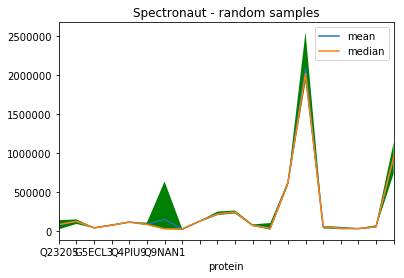

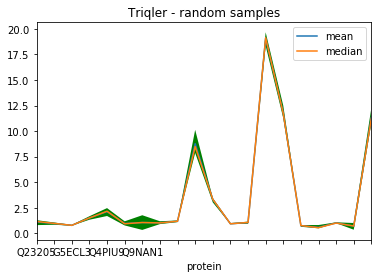

In [19]:
#Triqler is already run with a FRD treshold

#sns ts plot to to visualize diff
ax = sub_sample_s.plot(x="protein", y = ["mean", "median"])
plt.fill_between(x = "protein", y1 = "min", y2 = "max", data = sub_sample_s, facecolor='green')
plt.title("Spectronaut - random samples")

ax = sub_sample_t.plot(x="protein", y = ["mean", "median"])
plt.fill_between(x = "protein", y1 = "min", y2 = "max", data = sub_sample_t, facecolor='green')
plt.title("Triqler - random samples")


Code reads in triqler and spectronaut data. Removed decoy proteins. Compute mean, median, min, max and code plot function for mean and median (as lines) and fill-in with min-max borders. 

The code samples n random overlapping proteins from triqler and spectroanut and plots mean and median with min-max borders. 

Things to check in the code:
- Did i forget to treshold triqler data on q-values?
- What is the unit of triqler protein quantification? (Why is there a magnitude of difference)
- What was the normalization used in previous attempt? (within sample normalization, and why did that make sense?)
- Is there a better way to compare than the previous normalization?
- I guess it is between sample relationship that matter?
- Read up on spike-in proteomics? 


## 2020-12-02



In [47]:
os.chdir("/home/ptruong/git/bayesMS/bin")

In [35]:
import os 

import pandas as pd
import numpy as np 


In [48]:
from read_triqler_output import read_triqler_protein_output_to_df
from triqler_output_df_melter import melt_spectronaut_triqler_formatted, melt_triqler_output

In [3]:
# data dir /home/ptruong/git/bayesMS/data/old_data_pickled

In [5]:
os.chdir("/home/ptruong/git/bayesMS/data/old_data_pickled")

In [6]:
os.listdir()

['triqler.pkl',
 'spectronaut.pkl',
 'triqlerParams.txt',
 'spectronautParams.txt']

In [28]:
spec = pd.read_pickle(r'spectronaut.pkl')
triq = pd.read_pickle(r'triqler.pkl')


Note: To read triqler output data we need to use 

from read_triqler_output import read_triqler_protein_output_to_df

because the peptide seperation is the same as tab-seperation.

In [39]:
os.chdir("/home/ptruong/git/bayesMS/data/triqlerResults_largeScale_minSamp20_FC0_8_adjInt")

In [40]:
os.listdir()

['proteins.3vs8.tsv',
 'proteins.2vs9.tsv',
 'proteins.8vs10.tsv',
 'proteins.2vs8.tsv',
 'proteins.1vs9.tsv',
 'proteins.2vs3.tsv',
 'proteins.9vs10.tsv',
 'proteins.1vs10.tsv',
 'proteins.5vs6.tsv',
 'proteins.7vs9.tsv',
 'proteins.6vs10.tsv',
 'proteins.6vs7.tsv',
 'proteins.4vs6.tsv',
 'proteins.1vs2.tsv',
 'proteins.2vs6.tsv',
 'proteins.5vs7.tsv',
 'proteins.3vs4.tsv',
 'proteins.4vs8.tsv',
 'proteins.2vs10.tsv',
 'proteins.2vs5.tsv',
 'proteins.5vs8.tsv',
 'proteins.4vs7.tsv',
 'proteins.2vs4.tsv',
 'proteins.8vs9.tsv',
 'proteins.1vs5.tsv',
 'proteins.6vs9.tsv',
 'proteins.3vs9.tsv',
 'proteins.3vs7.tsv',
 'proteins.3vs6.tsv',
 'proteins.5vs10.tsv',
 'proteins.4vs10.tsv',
 'proteins.4vs9.tsv',
 'proteins.5vs9.tsv',
 'proteins.1vs8.tsv',
 'proteins.2vs7.tsv',
 'proteins.1vs3.tsv',
 'proteins.4vs5.tsv',
 'proteins.3vs10.tsv',
 'proteins.1vs4.tsv',
 'proteins.7vs10.tsv',
 'proteins.1vs7.tsv',
 'proteins.6vs8.tsv',
 'proteins.7vs8.tsv',
 'proteins.1vs6.tsv',
 'proteins.3vs5.tsv']

In [41]:
triq = read_triqler_protein_output_to_df('proteins.3vs8.tsv')

In [29]:
spec.columns

Index(['id', 'specie', 'protein', 'S01:S01_R01', 'S01:S01_R02', 'S01:S01_R03',
       'S01:S01_R04', 'S01:S01_R05', 'S02:S02_R01', 'S02:S02_R02',
       'S02:S02_R03', 'S02:S02_R04', 'S02:S02_R05', 'S03:S03_R01',
       'S03:S03_R02', 'S03:S03_R03', 'S03:S03_R05', 'S03:S04_R05',
       'S04:S04_R01', 'S04:S04_R02', 'S04:S04_R03', 'S04:S04_R04',
       'S04:S04_R05', 'S05:S05_R01', 'S05:S05_R02', 'S05:S05_R03',
       'S05:S05_R04', 'S05:S05_R05', 'S06:S06_R01', 'S06:S06_R02',
       'S06:S06_R03', 'S06:S06_R04', 'S06:S06_R05', 'S07:S07_R01',
       'S07:S07_R02', 'S07:S07_R03', 'S07:S07_R04', 'S07:S07_R05',
       'S08:S08_R01', 'S08:S08_R02', 'S08:S08_R03', 'S08:S08_R04',
       'S08:S08_R05', 'S09:S09_R01', 'S09:S09_R02', 'S09:S09_R03',
       'S09:S09_R04', 'S09:S09_R05', 'S10:S10_R01', 'S10:S10_R02',
       'S10:S10_R03', 'S10:S10_R04', 'S10:S10_R05'],
      dtype='object')

We notice naming error and rename the column S03:S04_R05 to S03:S03_R05

In [30]:
spec = spec.rename(columns={'S03:S04_R05': 'S03:S03_R04'})

triqler and spectroanut raw data is presented below. Both data set with 0.01 FDR treshold. 


In [8]:
spec

,id,specie,protein,S01:S01_R01,S01:S01_R02,S01:S01_R03,S01:S01_R04,S01:S01_R05,S02:S02_R01,S02:S02_R02,...,S09:S09_R01,S09:S09_R02,S09:S09_R03,S09:S09_R04,S09:S09_R05,S10:S10_R01,S10:S10_R02,S10:S10_R03,S10:S10_R04,S10:S10_R05
0,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,203877.890625,190713.625000,195925.703125,150170.421875,163190.718750,97127.828125,195944.765625,...,NaN,NaN,NaN,NaN,NaN,NaN,767819.750000,NaN,NaN,NaN
1,decoy_A0A023T4K3_CAEEL,CAEEL,decoy_A0A023T4K3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A0A061ACH4_CAEEL,CAEEL,A0A061ACH4,8781.009766,10325.387695,10948.747070,8789.944336,11853.339844,72.113838,3990.177002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A0A061ACL3_CAEEL,CAEEL,A0A061ACL3,298404.781250,296928.375000,309051.406250,325567.562500,277911.718750,144550.265625,142709.437500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A0A061ACR1_CAEEL,CAEEL,A0A061ACR1,336096.625000,354560.000000,378152.875000,359206.312500,387415.562500,187493.328125,200906.875000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15009,V6CLV0_CAEEL,CAEEL,V6CLV0,803615.500000,860085.062500,897633.250000,971245.750000,834293.187500,400180.968750,399113.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15010,V6CM07_CAEEL,CAEEL,V6CM07,18498.939453,21163.210938,19706.724609,28860.738281,16341.950195,13379.542969,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15011,X5JA13_ARATH,ARATH,X5JA13,141788.171875,102453.429688,97403.984375,92313.593750,101041.617188,125743.546875,114827.593750,...,164211.046875,85307.000000,88487.984375,95901.960938,81865.812500,127238.65625,110625.953125,98996.132812,98382.304688,81635.281250
15012,X5JB51_ARATH,ARATH,X5JB51,509657.687500,625327.125000,9751.568359,4141.071289,25130.304688,55028.699219,140951.250000,...,164315.000000,51476.402344,46677.218750,41652.757812,7216.791992,36751.68750,59819.433594,46432.910156,3826.284180,48352.703125


In [9]:
triq

,q_value,posterior_error_prob,num_peptides,protein_id_posterior_error_prob,log2_fold_change,diff_exp_prob_1.0,S01:S01_R01,S01:S01_R02,S01:S01_R03,S01:S01_R04,...,S10:S10_R02,S10:S10_R03,S10:S10_R04,S10:S10_R05,peptides,specie,decoy,id,protein,FDR
0,1.284000e-10,1.284000e-10,465,1.284000e-10,-11.47000,2.924000e-15,0.000238,0.000244,0.000480,0.000195,...,2.4480,2.4250,2.5010,2.4420,VKMPDVDISVPK|FKMPFLSISSPK|FKMPEINIK|ISM[16]SEV...,HUMAN,False,Q09666_HUMAN,Q09666,1.284000e-10
1,1.420000e-10,1.556000e-10,421,1.556000e-10,-10.43000,8.442000e-14,0.000804,0.000450,0.000397,0.000422,...,2.4030,2.2490,2.2650,2.3440,SLQEEHVAVAQLR|EAEQEAARR|KQEELQQLEQQR|TISLVIR|I...,HUMAN,False,Q15149_HUMAN,Q15149,1.420000e-10
2,2.176000e-10,3.686000e-10,311,3.686000e-10,-10.21000,2.266000e-14,0.000641,0.000293,0.000492,0.001091,...,2.4610,2.2850,2.3040,2.2670,EM[16]KPVIFLDVFLPR|LLNFLMK|NLLIFENLIDLKR|YKEVY...,HUMAN,False,P78527-2_HUMAN,P78527-2,2.175333e-10
3,2.622000e-10,3.960000e-10,314,3.936000e-10,-9.47600,2.345000e-12,0.001133,0.000662,0.000671,0.001489,...,2.2670,2.1890,2.1260,2.0830,LKVNFLPEIITLSK|LSLSNAISTALPLTQLR|INMLVIELK|WAI...,HUMAN,False,Q14204_HUMAN,Q14204,2.615500e-10
5,5.753000e-10,1.204000e-09,238,1.183000e-09,-8.84800,2.112000e-11,0.001145,0.002007,0.001241,0.001354,...,2.2320,2.0110,1.9700,2.0390,GRSEADSDKNATILELR|NGVGTSSSMGSGVSDDVFSSSR|NLPLA...,HUMAN,False,P15924_HUMAN,P15924,4.458400e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9425,5.113000e-01,9.990000e-01,3,1.116000e-01,0.21620,9.989000e-01,1.135000,1.156000,1.031000,1.021000,...,1.0090,1.0090,1.0090,1.0090,ESGDQLSVSR|GIGLGLVQQLVK|NAALTVEQSTAELISSFNK,CAEEL,False,P90780_CAEEL,P90780,9.970788e-03
6074,2.684000e-01,9.112000e-01,1,1.118000e-01,0.27480,9.000000e-01,1.920000,2.049000,1.938000,2.441000,...,0.9519,0.9519,0.9519,0.9519,RIGYGIK,CAEEL,False,Q9TVW5_CAEEL,Q9TVW5,9.977931e-03
11844,5.984000e-01,9.999000e-01,3,1.119000e-01,0.02839,9.999000e-01,0.988800,0.981800,0.988800,0.988800,...,1.0370,1.0370,0.8964,1.1400,VACGEGATTEKRPAEAAVEL|DLKIPSEDLSNLVEQCLEK|SFEYC...,HUMAN,True,decoy_O96017_HUMAN,O96017,9.985081e-03
9835,5.295000e-01,9.994000e-01,3,1.121000e-01,-0.06439,9.994000e-01,0.904700,0.831100,0.747000,0.765600,...,1.0830,1.0660,1.0940,1.0090,TGAALLIVPR|VVDTETGISLPR|SQGSQLTEDDVK,ARATH,False,Q9LU36_ARATH,Q9LU36,9.992243e-03


The reported protein expressions per run are the expected value of the protein's expression in that run. They represent relative values (not log transformed) to the protein's mean expression across all runs, which itself would correspond to the value 1.0. For example, a value of 1.5 means that the expression in this sample is 50% higher than the mean across all runs. A second example comparing values across samples: if sample1 has a value of 2.0 and sample2 a value of 1.5, it means that the expression in sample1 is 33% higher than in sample2 (2.0/1.5=1.33). We don't necessarily recommend using these values for downstream analysis, as the idea is that the actual value of interest is the fold change between treatment groups rather than between samples.

The triqler proteins are relative values, so we need to transform spectroanut values to relative values.

We should also treshold the triqler results on protein_id_posterior_error_prob

In [10]:
print(sum(triq.protein_id_posterior_error_prob < 0.01))

11162


In [25]:
print("%s : %i" % ("triqler number of protein ids", int(sum(triq.protein_id_posterior_error_prob < 0.01))))
print("%s : %i" % ("spectronaut number of protein ids", int(len(spec))))

triqler number of protein ids : 11162
spectronaut number of protein ids : 15014


Spectronaut has higher than protein count, but looking at the data above we can see that there are plenty of NaN among samples in the spectronaut. We need to fix this.

We could do this by saying that proteins with more than 2 or 3 NaN in a samples if left out. 

We wrangle triq and spec data to melted df for easier data manipulation. Scripts for this can be found in 

"from triqler_output_df_melter import melt_spectronaut_triqler_formatted, melt_triqler_output"



In [49]:
triq = melt_triqler_output(triq)
spec = melt_spectronaut_triqler_formatted(spec)

0/10861
1/10861
2/10861
3/10861
4/10861
5/10861
6/10861
7/10861
8/10861
9/10861
10/10861
11/10861
12/10861
13/10861
14/10861
15/10861
16/10861
17/10861
18/10861
19/10861
20/10861
21/10861
22/10861
23/10861
24/10861
25/10861
26/10861
27/10861
28/10861
29/10861
30/10861
31/10861
32/10861
33/10861
34/10861
35/10861
36/10861
37/10861
38/10861
39/10861
40/10861
41/10861
42/10861
43/10861
44/10861
45/10861
46/10861
47/10861
48/10861
49/10861
50/10861
51/10861
52/10861
53/10861
54/10861
55/10861
56/10861
57/10861
58/10861
59/10861
60/10861
61/10861
62/10861
63/10861
64/10861
65/10861
66/10861
67/10861
68/10861
69/10861
70/10861
71/10861
72/10861
73/10861
74/10861
75/10861
76/10861
77/10861
78/10861
79/10861
80/10861
81/10861
82/10861
83/10861
84/10861
85/10861
86/10861
87/10861
88/10861
89/10861
90/10861
91/10861
92/10861
93/10861
94/10861
95/10861
96/10861
97/10861
98/10861
99/10861
100/10861
101/10861
102/10861
103/10861
104/10861
105/10861
106/10861
107/10861
108/10861
109/10861
110/10861


833/10861
834/10861
835/10861
836/10861
837/10861
838/10861
839/10861
840/10861
841/10861
842/10861
843/10861
844/10861
845/10861
846/10861
847/10861
848/10861
849/10861
850/10861
851/10861
852/10861
853/10861
854/10861
855/10861
856/10861
857/10861
858/10861
859/10861
860/10861
861/10861
862/10861
863/10861
864/10861
865/10861
866/10861
867/10861
868/10861
869/10861
870/10861
871/10861
872/10861
873/10861
874/10861
875/10861
876/10861
877/10861
878/10861
879/10861
880/10861
881/10861
882/10861
883/10861
884/10861
885/10861
886/10861
887/10861
888/10861
889/10861
890/10861
891/10861
892/10861
893/10861
894/10861
895/10861
896/10861
897/10861
898/10861
899/10861
900/10861
901/10861
902/10861
903/10861
904/10861
905/10861
906/10861
907/10861
908/10861
909/10861
910/10861
911/10861
912/10861
913/10861
914/10861
915/10861
916/10861
917/10861
918/10861
919/10861
920/10861
921/10861
922/10861
923/10861
924/10861
925/10861
926/10861
927/10861
928/10861
929/10861
930/10861
931/10861
932/10861


1597/10861
1598/10861
1599/10861
1600/10861
1601/10861
1602/10861
1603/10861
1604/10861
1605/10861
1606/10861
1607/10861
1608/10861
1609/10861
1610/10861
1611/10861
1612/10861
1613/10861
1614/10861
1615/10861
1616/10861
1617/10861
1618/10861
1619/10861
1620/10861
1621/10861
1622/10861
1623/10861
1624/10861
1625/10861
1626/10861
1627/10861
1628/10861
1629/10861
1630/10861
1631/10861
1632/10861
1633/10861
1634/10861
1635/10861
1636/10861
1637/10861
1638/10861
1639/10861
1640/10861
1641/10861
1642/10861
1643/10861
1644/10861
1645/10861
1646/10861
1647/10861
1648/10861
1649/10861
1650/10861
1651/10861
1652/10861
1653/10861
1654/10861
1655/10861
1656/10861
1657/10861
1658/10861
1659/10861
1660/10861
1661/10861
1662/10861
1663/10861
1664/10861
1665/10861
1666/10861
1667/10861
1668/10861
1669/10861
1670/10861
1671/10861
1672/10861
1673/10861
1674/10861
1675/10861
1676/10861
1677/10861
1678/10861
1679/10861
1680/10861
1681/10861
1682/10861
1683/10861
1684/10861
1685/10861
1686/10861
1687/10861

2346/10861
2347/10861
2348/10861
2349/10861
2350/10861
2351/10861
2352/10861
2353/10861
2354/10861
2355/10861
2356/10861
2357/10861
2358/10861
2359/10861
2360/10861
2361/10861
2362/10861
2363/10861
2364/10861
2365/10861
2366/10861
2367/10861
2368/10861
2369/10861
2370/10861
2371/10861
2372/10861
2373/10861
2374/10861
2375/10861
2376/10861
2377/10861
2378/10861
2379/10861
2380/10861
2381/10861
2382/10861
2383/10861
2384/10861
2385/10861
2386/10861
2387/10861
2388/10861
2389/10861
2390/10861
2391/10861
2392/10861
2393/10861
2394/10861
2395/10861
2396/10861
2397/10861
2398/10861
2399/10861
2400/10861
2401/10861
2402/10861
2403/10861
2404/10861
2405/10861
2406/10861
2407/10861
2408/10861
2409/10861
2410/10861
2411/10861
2412/10861
2413/10861
2414/10861
2415/10861
2416/10861
2417/10861
2418/10861
2419/10861
2420/10861
2421/10861
2422/10861
2423/10861
2424/10861
2425/10861
2426/10861
2427/10861
2428/10861
2429/10861
2430/10861
2431/10861
2432/10861
2433/10861
2434/10861
2435/10861
2436/10861

3096/10861
3097/10861
3098/10861
3099/10861
3100/10861
3101/10861
3102/10861
3103/10861
3104/10861
3105/10861
3106/10861
3107/10861
3108/10861
3109/10861
3110/10861
3111/10861
3112/10861
3113/10861
3114/10861
3115/10861
3116/10861
3117/10861
3118/10861
3119/10861
3120/10861
3121/10861
3122/10861
3123/10861
3124/10861
3125/10861
3126/10861
3127/10861
3128/10861
3129/10861
3130/10861
3131/10861
3132/10861
3133/10861
3134/10861
3135/10861
3136/10861
3137/10861
3138/10861
3139/10861
3140/10861
3141/10861
3142/10861
3143/10861
3144/10861
3145/10861
3146/10861
3147/10861
3148/10861
3149/10861
3150/10861
3151/10861
3152/10861
3153/10861
3154/10861
3155/10861
3156/10861
3157/10861
3158/10861
3159/10861
3160/10861
3161/10861
3162/10861
3163/10861
3164/10861
3165/10861
3166/10861
3167/10861
3168/10861
3169/10861
3170/10861
3171/10861
3172/10861
3173/10861
3174/10861
3175/10861
3176/10861
3177/10861
3178/10861
3179/10861
3180/10861
3181/10861
3182/10861
3183/10861
3184/10861
3185/10861
3186/10861

3844/10861
3845/10861
3846/10861
3847/10861
3848/10861
3849/10861
3850/10861
3851/10861
3852/10861
3853/10861
3854/10861
3855/10861
3856/10861
3857/10861
3858/10861
3859/10861
3860/10861
3861/10861
3862/10861
3863/10861
3864/10861
3865/10861
3866/10861
3867/10861
3868/10861
3869/10861
3870/10861
3871/10861
3872/10861
3873/10861
3874/10861
3875/10861
3876/10861
3877/10861
3878/10861
3879/10861
3880/10861
3881/10861
3882/10861
3883/10861
3884/10861
3885/10861
3886/10861
3887/10861
3888/10861
3889/10861
3890/10861
3891/10861
3892/10861
3893/10861
3894/10861
3895/10861
3896/10861
3897/10861
3898/10861
3899/10861
3900/10861
3901/10861
3902/10861
3903/10861
3904/10861
3905/10861
3906/10861
3907/10861
3908/10861
3909/10861
3910/10861
3911/10861
3912/10861
3913/10861
3914/10861
3915/10861
3916/10861
3917/10861
3918/10861
3919/10861
3920/10861
3921/10861
3922/10861
3923/10861
3924/10861
3925/10861
3926/10861
3927/10861
3928/10861
3929/10861
3930/10861
3931/10861
3932/10861
3933/10861
3934/10861

4597/10861
4598/10861
4599/10861
4600/10861
4601/10861
4602/10861
4603/10861
4604/10861
4605/10861
4606/10861
4607/10861
4608/10861
4609/10861
4610/10861
4611/10861
4612/10861
4613/10861
4614/10861
4615/10861
4616/10861
4617/10861
4618/10861
4619/10861
4620/10861
4621/10861
4622/10861
4623/10861
4624/10861
4625/10861
4626/10861
4627/10861
4628/10861
4629/10861
4630/10861
4631/10861
4632/10861
4633/10861
4634/10861
4635/10861
4636/10861
4637/10861
4638/10861
4639/10861
4640/10861
4641/10861
4642/10861
4643/10861
4644/10861
4645/10861
4646/10861
4647/10861
4648/10861
4649/10861
4650/10861
4651/10861
4652/10861
4653/10861
4654/10861
4655/10861
4656/10861
4657/10861
4658/10861
4659/10861
4660/10861
4661/10861
4662/10861
4663/10861
4664/10861
4665/10861
4666/10861
4667/10861
4668/10861
4669/10861
4670/10861
4671/10861
4672/10861
4673/10861
4674/10861
4675/10861
4676/10861
4677/10861
4678/10861
4679/10861
4680/10861
4681/10861
4682/10861
4683/10861
4684/10861
4685/10861
4686/10861
4687/10861

5348/10861
5349/10861
5350/10861
5351/10861
5352/10861
5353/10861
5354/10861
5355/10861
5356/10861
5357/10861
5358/10861
5359/10861
5360/10861
5361/10861
5362/10861
5363/10861
5364/10861
5365/10861
5366/10861
5367/10861
5368/10861
5369/10861
5370/10861
5371/10861
5372/10861
5373/10861
5374/10861
5375/10861
5376/10861
5377/10861
5378/10861
5379/10861
5380/10861
5381/10861
5382/10861
5383/10861
5384/10861
5385/10861
5386/10861
5387/10861
5388/10861
5389/10861
5390/10861
5391/10861
5392/10861
5393/10861
5394/10861
5395/10861
5396/10861
5397/10861
5398/10861
5399/10861
5400/10861
5401/10861
5402/10861
5403/10861
5404/10861
5405/10861
5406/10861
5407/10861
5408/10861
5409/10861
5410/10861
5411/10861
5412/10861
5413/10861
5414/10861
5415/10861
5416/10861
5417/10861
5418/10861
5419/10861
5420/10861
5421/10861
5422/10861
5423/10861
5424/10861
5425/10861
5426/10861
5427/10861
5428/10861
5429/10861
5430/10861
5431/10861
5432/10861
5433/10861
5434/10861
5435/10861
5436/10861
5437/10861
5438/10861

6095/10861
6096/10861
6097/10861
6098/10861
6099/10861
6100/10861
6101/10861
6102/10861
6103/10861
6104/10861
6105/10861
6106/10861
6107/10861
6108/10861
6109/10861
6110/10861
6111/10861
6112/10861
6113/10861
6114/10861
6115/10861
6116/10861
6117/10861
6118/10861
6119/10861
6120/10861
6121/10861
6122/10861
6123/10861
6124/10861
6125/10861
6126/10861
6127/10861
6128/10861
6129/10861
6130/10861
6131/10861
6132/10861
6133/10861
6134/10861
6135/10861
6136/10861
6137/10861
6138/10861
6139/10861
6140/10861
6141/10861
6142/10861
6143/10861
6144/10861
6145/10861
6146/10861
6147/10861
6148/10861
6149/10861
6150/10861
6151/10861
6152/10861
6153/10861
6154/10861
6155/10861
6156/10861
6157/10861
6158/10861
6159/10861
6160/10861
6161/10861
6162/10861
6163/10861
6164/10861
6165/10861
6166/10861
6167/10861
6168/10861
6169/10861
6170/10861
6171/10861
6172/10861
6173/10861
6174/10861
6175/10861
6176/10861
6177/10861
6178/10861
6179/10861
6180/10861
6181/10861
6182/10861
6183/10861
6184/10861
6185/10861

6841/10861
6842/10861
6843/10861
6844/10861
6845/10861
6846/10861
6847/10861
6848/10861
6849/10861
6850/10861
6851/10861
6852/10861
6853/10861
6854/10861
6855/10861
6856/10861
6857/10861
6858/10861
6859/10861
6860/10861
6861/10861
6862/10861
6863/10861
6864/10861
6865/10861
6866/10861
6867/10861
6868/10861
6869/10861
6870/10861
6871/10861
6872/10861
6873/10861
6874/10861
6875/10861
6876/10861
6877/10861
6878/10861
6879/10861
6880/10861
6881/10861
6882/10861
6883/10861
6884/10861
6885/10861
6886/10861
6887/10861
6888/10861
6889/10861
6890/10861
6891/10861
6892/10861
6893/10861
6894/10861
6895/10861
6896/10861
6897/10861
6898/10861
6899/10861
6900/10861
6901/10861
6902/10861
6903/10861
6904/10861
6905/10861
6906/10861
6907/10861
6908/10861
6909/10861
6910/10861
6911/10861
6912/10861
6913/10861
6914/10861
6915/10861
6916/10861
6917/10861
6918/10861
6919/10861
6920/10861
6921/10861
6922/10861
6923/10861
6924/10861
6925/10861
6926/10861
6927/10861
6928/10861
6929/10861
6930/10861
6931/10861

7590/10861
7591/10861
7592/10861
7593/10861
7594/10861
7595/10861
7596/10861
7597/10861
7598/10861
7599/10861
7600/10861
7601/10861
7602/10861
7603/10861
7604/10861
7605/10861
7606/10861
7607/10861
7608/10861
7609/10861
7610/10861
7611/10861
7612/10861
7613/10861
7614/10861
7615/10861
7616/10861
7617/10861
7618/10861
7619/10861
7620/10861
7621/10861
7622/10861
7623/10861
7624/10861
7625/10861
7626/10861
7627/10861
7628/10861
7629/10861
7630/10861
7631/10861
7632/10861
7633/10861
7634/10861
7635/10861
7636/10861
7637/10861
7638/10861
7639/10861
7640/10861
7641/10861
7642/10861
7643/10861
7644/10861
7645/10861
7646/10861
7647/10861
7648/10861
7649/10861
7650/10861
7651/10861
7652/10861
7653/10861
7654/10861
7655/10861
7656/10861
7657/10861
7658/10861
7659/10861
7660/10861
7661/10861
7662/10861
7663/10861
7664/10861
7665/10861
7666/10861
7667/10861
7668/10861
7669/10861
7670/10861
7671/10861
7672/10861
7673/10861
7674/10861
7675/10861
7676/10861
7677/10861
7678/10861
7679/10861
7680/10861

8344/10861
8345/10861
8346/10861
8347/10861
8348/10861
8349/10861
8350/10861
8351/10861
8352/10861
8353/10861
8354/10861
8355/10861
8356/10861
8357/10861
8358/10861
8359/10861
8360/10861
8361/10861
8362/10861
8363/10861
8364/10861
8365/10861
8366/10861
8367/10861
8368/10861
8369/10861
8370/10861
8371/10861
8372/10861
8373/10861
8374/10861
8375/10861
8376/10861
8377/10861
8378/10861
8379/10861
8380/10861
8381/10861
8382/10861
8383/10861
8384/10861
8385/10861
8386/10861
8387/10861
8388/10861
8389/10861
8390/10861
8391/10861
8392/10861
8393/10861
8394/10861
8395/10861
8396/10861
8397/10861
8398/10861
8399/10861
8400/10861
8401/10861
8402/10861
8403/10861
8404/10861
8405/10861
8406/10861
8407/10861
8408/10861
8409/10861
8410/10861
8411/10861
8412/10861
8413/10861
8414/10861
8415/10861
8416/10861
8417/10861
8418/10861
8419/10861
8420/10861
8421/10861
8422/10861
8423/10861
8424/10861
8425/10861
8426/10861
8427/10861
8428/10861
8429/10861
8430/10861
8431/10861
8432/10861
8433/10861
8434/10861

9092/10861
9093/10861
9094/10861
9095/10861
9096/10861
9097/10861
9098/10861
9099/10861
9100/10861
9101/10861
9102/10861
9103/10861
9104/10861
9105/10861
9106/10861
9107/10861
9108/10861
9109/10861
9110/10861
9111/10861
9112/10861
9113/10861
9114/10861
9115/10861
9116/10861
9117/10861
9118/10861
9119/10861
9120/10861
9121/10861
9122/10861
9123/10861
9124/10861
9125/10861
9126/10861
9127/10861
9128/10861
9129/10861
9130/10861
9131/10861
9132/10861
9133/10861
9134/10861
9135/10861
9136/10861
9137/10861
9138/10861
9139/10861
9140/10861
9141/10861
9142/10861
9143/10861
9144/10861
9145/10861
9146/10861
9147/10861
9148/10861
9149/10861
9150/10861
9151/10861
9152/10861
9153/10861
9154/10861
9155/10861
9156/10861
9157/10861
9158/10861
9159/10861
9160/10861
9161/10861
9162/10861
9163/10861
9164/10861
9165/10861
9166/10861
9167/10861
9168/10861
9169/10861
9170/10861
9171/10861
9172/10861
9173/10861
9174/10861
9175/10861
9176/10861
9177/10861
9178/10861
9179/10861
9180/10861
9181/10861
9182/10861

9838/10861
9839/10861
9840/10861
9841/10861
9842/10861
9843/10861
9844/10861
9845/10861
9846/10861
9847/10861
9848/10861
9849/10861
9850/10861
9851/10861
9852/10861
9853/10861
9854/10861
9855/10861
9856/10861
9857/10861
9858/10861
9859/10861
9860/10861
9861/10861
9862/10861
9863/10861
9864/10861
9865/10861
9866/10861
9867/10861
9868/10861
9869/10861
9870/10861
9871/10861
9872/10861
9873/10861
9874/10861
9875/10861
9876/10861
9877/10861
9878/10861
9879/10861
9880/10861
9881/10861
9882/10861
9883/10861
9884/10861
9885/10861
9886/10861
9887/10861
9888/10861
9889/10861
9890/10861
9891/10861
9892/10861
9893/10861
9894/10861
9895/10861
9896/10861
9897/10861
9898/10861
9899/10861
9900/10861
9901/10861
9902/10861
9903/10861
9904/10861
9905/10861
9906/10861
9907/10861
9908/10861
9909/10861
9910/10861
9911/10861
9912/10861
9913/10861
9914/10861
9915/10861
9916/10861
9917/10861
9918/10861
9919/10861
9920/10861
9921/10861
9922/10861
9923/10861
9924/10861
9925/10861
9926/10861
9927/10861
9928/10861

10536/10861
10537/10861
10538/10861
10539/10861
10540/10861
10541/10861
10542/10861
10543/10861
10544/10861
10545/10861
10546/10861
10547/10861
10548/10861
10549/10861
10550/10861
10551/10861
10552/10861
10553/10861
10554/10861
10555/10861
10556/10861
10557/10861
10558/10861
10559/10861
10560/10861
10561/10861
10562/10861
10563/10861
10564/10861
10565/10861
10566/10861
10567/10861
10568/10861
10569/10861
10570/10861
10571/10861
10572/10861
10573/10861
10574/10861
10575/10861
10576/10861
10577/10861
10578/10861
10579/10861
10580/10861
10581/10861
10582/10861
10583/10861
10584/10861
10585/10861
10586/10861
10587/10861
10588/10861
10589/10861
10590/10861
10591/10861
10592/10861
10593/10861
10594/10861
10595/10861
10596/10861
10597/10861
10598/10861
10599/10861
10600/10861
10601/10861
10602/10861
10603/10861
10604/10861
10605/10861
10606/10861
10607/10861
10608/10861
10609/10861
10610/10861
10611/10861
10612/10861
10613/10861
10614/10861
10615/10861
10616/10861
10617/10861
10618/10861
1061

439/15014
440/15014
441/15014
442/15014
443/15014
444/15014
445/15014
446/15014
447/15014
448/15014
449/15014
450/15014
451/15014
452/15014
453/15014
454/15014
455/15014
456/15014
457/15014
458/15014
459/15014
460/15014
461/15014
462/15014
463/15014
464/15014
465/15014
466/15014
467/15014
468/15014
469/15014
470/15014
471/15014
472/15014
473/15014
474/15014
475/15014
476/15014
477/15014
478/15014
479/15014
480/15014
481/15014
482/15014
483/15014
484/15014
485/15014
486/15014
487/15014
488/15014
489/15014
490/15014
491/15014
492/15014
493/15014
494/15014
495/15014
496/15014
497/15014
498/15014
499/15014
500/15014
501/15014
502/15014
503/15014
504/15014
505/15014
506/15014
507/15014
508/15014
509/15014
510/15014
511/15014
512/15014
513/15014
514/15014
515/15014
516/15014
517/15014
518/15014
519/15014
520/15014
521/15014
522/15014
523/15014
524/15014
525/15014
526/15014
527/15014
528/15014
529/15014
530/15014
531/15014
532/15014
533/15014
534/15014
535/15014
536/15014
537/15014
538/15014


1245/15014
1246/15014
1247/15014
1248/15014
1249/15014
1250/15014
1251/15014
1252/15014
1253/15014
1254/15014
1255/15014
1256/15014
1257/15014
1258/15014
1259/15014
1260/15014
1261/15014
1262/15014
1263/15014
1264/15014
1265/15014
1266/15014
1267/15014
1268/15014
1269/15014
1270/15014
1271/15014
1272/15014
1273/15014
1274/15014
1275/15014
1276/15014
1277/15014
1278/15014
1279/15014
1280/15014
1281/15014
1282/15014
1283/15014
1284/15014
1285/15014
1286/15014
1287/15014
1288/15014
1289/15014
1290/15014
1291/15014
1292/15014
1293/15014
1294/15014
1295/15014
1296/15014
1297/15014
1298/15014
1299/15014
1300/15014
1301/15014
1302/15014
1303/15014
1304/15014
1305/15014
1306/15014
1307/15014
1308/15014
1309/15014
1310/15014
1311/15014
1312/15014
1313/15014
1314/15014
1315/15014
1316/15014
1317/15014
1318/15014
1319/15014
1320/15014
1321/15014
1322/15014
1323/15014
1324/15014
1325/15014
1326/15014
1327/15014
1328/15014
1329/15014
1330/15014
1331/15014
1332/15014
1333/15014
1334/15014
1335/15014

1994/15014
1995/15014
1996/15014
1997/15014
1998/15014
1999/15014
2000/15014
2001/15014
2002/15014
2003/15014
2004/15014
2005/15014
2006/15014
2007/15014
2008/15014
2009/15014
2010/15014
2011/15014
2012/15014
2013/15014
2014/15014
2015/15014
2016/15014
2017/15014
2018/15014
2019/15014
2020/15014
2021/15014
2022/15014
2023/15014
2024/15014
2025/15014
2026/15014
2027/15014
2028/15014
2029/15014
2030/15014
2031/15014
2032/15014
2033/15014
2034/15014
2035/15014
2036/15014
2037/15014
2038/15014
2039/15014
2040/15014
2041/15014
2042/15014
2043/15014
2044/15014
2045/15014
2046/15014
2047/15014
2048/15014
2049/15014
2050/15014
2051/15014
2052/15014
2053/15014
2054/15014
2055/15014
2056/15014
2057/15014
2058/15014
2059/15014
2060/15014
2061/15014
2062/15014
2063/15014
2064/15014
2065/15014
2066/15014
2067/15014
2068/15014
2069/15014
2070/15014
2071/15014
2072/15014
2073/15014
2074/15014
2075/15014
2076/15014
2077/15014
2078/15014
2079/15014
2080/15014
2081/15014
2082/15014
2083/15014
2084/15014

2745/15014
2746/15014
2747/15014
2748/15014
2749/15014
2750/15014
2751/15014
2752/15014
2753/15014
2754/15014
2755/15014
2756/15014
2757/15014
2758/15014
2759/15014
2760/15014
2761/15014
2762/15014
2763/15014
2764/15014
2765/15014
2766/15014
2767/15014
2768/15014
2769/15014
2770/15014
2771/15014
2772/15014
2773/15014
2774/15014
2775/15014
2776/15014
2777/15014
2778/15014
2779/15014
2780/15014
2781/15014
2782/15014
2783/15014
2784/15014
2785/15014
2786/15014
2787/15014
2788/15014
2789/15014
2790/15014
2791/15014
2792/15014
2793/15014
2794/15014
2795/15014
2796/15014
2797/15014
2798/15014
2799/15014
2800/15014
2801/15014
2802/15014
2803/15014
2804/15014
2805/15014
2806/15014
2807/15014
2808/15014
2809/15014
2810/15014
2811/15014
2812/15014
2813/15014
2814/15014
2815/15014
2816/15014
2817/15014
2818/15014
2819/15014
2820/15014
2821/15014
2822/15014
2823/15014
2824/15014
2825/15014
2826/15014
2827/15014
2828/15014
2829/15014
2830/15014
2831/15014
2832/15014
2833/15014
2834/15014
2835/15014

3495/15014
3496/15014
3497/15014
3498/15014
3499/15014
3500/15014
3501/15014
3502/15014
3503/15014
3504/15014
3505/15014
3506/15014
3507/15014
3508/15014
3509/15014
3510/15014
3511/15014
3512/15014
3513/15014
3514/15014
3515/15014
3516/15014
3517/15014
3518/15014
3519/15014
3520/15014
3521/15014
3522/15014
3523/15014
3524/15014
3525/15014
3526/15014
3527/15014
3528/15014
3529/15014
3530/15014
3531/15014
3532/15014
3533/15014
3534/15014
3535/15014
3536/15014
3537/15014
3538/15014
3539/15014
3540/15014
3541/15014
3542/15014
3543/15014
3544/15014
3545/15014
3546/15014
3547/15014
3548/15014
3549/15014
3550/15014
3551/15014
3552/15014
3553/15014
3554/15014
3555/15014
3556/15014
3557/15014
3558/15014
3559/15014
3560/15014
3561/15014
3562/15014
3563/15014
3564/15014
3565/15014
3566/15014
3567/15014
3568/15014
3569/15014
3570/15014
3571/15014
3572/15014
3573/15014
3574/15014
3575/15014
3576/15014
3577/15014
3578/15014
3579/15014
3580/15014
3581/15014
3582/15014
3583/15014
3584/15014
3585/15014

4247/15014
4248/15014
4249/15014
4250/15014
4251/15014
4252/15014
4253/15014
4254/15014
4255/15014
4256/15014
4257/15014
4258/15014
4259/15014
4260/15014
4261/15014
4262/15014
4263/15014
4264/15014
4265/15014
4266/15014
4267/15014
4268/15014
4269/15014
4270/15014
4271/15014
4272/15014
4273/15014
4274/15014
4275/15014
4276/15014
4277/15014
4278/15014
4279/15014
4280/15014
4281/15014
4282/15014
4283/15014
4284/15014
4285/15014
4286/15014
4287/15014
4288/15014
4289/15014
4290/15014
4291/15014
4292/15014
4293/15014
4294/15014
4295/15014
4296/15014
4297/15014
4298/15014
4299/15014
4300/15014
4301/15014
4302/15014
4303/15014
4304/15014
4305/15014
4306/15014
4307/15014
4308/15014
4309/15014
4310/15014
4311/15014
4312/15014
4313/15014
4314/15014
4315/15014
4316/15014
4317/15014
4318/15014
4319/15014
4320/15014
4321/15014
4322/15014
4323/15014
4324/15014
4325/15014
4326/15014
4327/15014
4328/15014
4329/15014
4330/15014
4331/15014
4332/15014
4333/15014
4334/15014
4335/15014
4336/15014
4337/15014

5001/15014
5002/15014
5003/15014
5004/15014
5005/15014
5006/15014
5007/15014
5008/15014
5009/15014
5010/15014
5011/15014
5012/15014
5013/15014
5014/15014
5015/15014
5016/15014
5017/15014
5018/15014
5019/15014
5020/15014
5021/15014
5022/15014
5023/15014
5024/15014
5025/15014
5026/15014
5027/15014
5028/15014
5029/15014
5030/15014
5031/15014
5032/15014
5033/15014
5034/15014
5035/15014
5036/15014
5037/15014
5038/15014
5039/15014
5040/15014
5041/15014
5042/15014
5043/15014
5044/15014
5045/15014
5046/15014
5047/15014
5048/15014
5049/15014
5050/15014
5051/15014
5052/15014
5053/15014
5054/15014
5055/15014
5056/15014
5057/15014
5058/15014
5059/15014
5060/15014
5061/15014
5062/15014
5063/15014
5064/15014
5065/15014
5066/15014
5067/15014
5068/15014
5069/15014
5070/15014
5071/15014
5072/15014
5073/15014
5074/15014
5075/15014
5076/15014
5077/15014
5078/15014
5079/15014
5080/15014
5081/15014
5082/15014
5083/15014
5084/15014
5085/15014
5086/15014
5087/15014
5088/15014
5089/15014
5090/15014
5091/15014

5751/15014
5752/15014
5753/15014
5754/15014
5755/15014
5756/15014
5757/15014
5758/15014
5759/15014
5760/15014
5761/15014
5762/15014
5763/15014
5764/15014
5765/15014
5766/15014
5767/15014
5768/15014
5769/15014
5770/15014
5771/15014
5772/15014
5773/15014
5774/15014
5775/15014
5776/15014
5777/15014
5778/15014
5779/15014
5780/15014
5781/15014
5782/15014
5783/15014
5784/15014
5785/15014
5786/15014
5787/15014
5788/15014
5789/15014
5790/15014
5791/15014
5792/15014
5793/15014
5794/15014
5795/15014
5796/15014
5797/15014
5798/15014
5799/15014
5800/15014
5801/15014
5802/15014
5803/15014
5804/15014
5805/15014
5806/15014
5807/15014
5808/15014
5809/15014
5810/15014
5811/15014
5812/15014
5813/15014
5814/15014
5815/15014
5816/15014
5817/15014
5818/15014
5819/15014
5820/15014
5821/15014
5822/15014
5823/15014
5824/15014
5825/15014
5826/15014
5827/15014
5828/15014
5829/15014
5830/15014
5831/15014
5832/15014
5833/15014
5834/15014
5835/15014
5836/15014
5837/15014
5838/15014
5839/15014
5840/15014
5841/15014

6504/15014
6505/15014
6506/15014
6507/15014
6508/15014
6509/15014
6510/15014
6511/15014
6512/15014
6513/15014
6514/15014
6515/15014
6516/15014
6517/15014
6518/15014
6519/15014
6520/15014
6521/15014
6522/15014
6523/15014
6524/15014
6525/15014
6526/15014
6527/15014
6528/15014
6529/15014
6530/15014
6531/15014
6532/15014
6533/15014
6534/15014
6535/15014
6536/15014
6537/15014
6538/15014
6539/15014
6540/15014
6541/15014
6542/15014
6543/15014
6544/15014
6545/15014
6546/15014
6547/15014
6548/15014
6549/15014
6550/15014
6551/15014
6552/15014
6553/15014
6554/15014
6555/15014
6556/15014
6557/15014
6558/15014
6559/15014
6560/15014
6561/15014
6562/15014
6563/15014
6564/15014
6565/15014
6566/15014
6567/15014
6568/15014
6569/15014
6570/15014
6571/15014
6572/15014
6573/15014
6574/15014
6575/15014
6576/15014
6577/15014
6578/15014
6579/15014
6580/15014
6581/15014
6582/15014
6583/15014
6584/15014
6585/15014
6586/15014
6587/15014
6588/15014
6589/15014
6590/15014
6591/15014
6592/15014
6593/15014
6594/15014

7254/15014
7255/15014
7256/15014
7257/15014
7258/15014
7259/15014
7260/15014
7261/15014
7262/15014
7263/15014
7264/15014
7265/15014
7266/15014
7267/15014
7268/15014
7269/15014
7270/15014
7271/15014
7272/15014
7273/15014
7274/15014
7275/15014
7276/15014
7277/15014
7278/15014
7279/15014
7280/15014
7281/15014
7282/15014
7283/15014
7284/15014
7285/15014
7286/15014
7287/15014
7288/15014
7289/15014
7290/15014
7291/15014
7292/15014
7293/15014
7294/15014
7295/15014
7296/15014
7297/15014
7298/15014
7299/15014
7300/15014
7301/15014
7302/15014
7303/15014
7304/15014
7305/15014
7306/15014
7307/15014
7308/15014
7309/15014
7310/15014
7311/15014
7312/15014
7313/15014
7314/15014
7315/15014
7316/15014
7317/15014
7318/15014
7319/15014
7320/15014
7321/15014
7322/15014
7323/15014
7324/15014
7325/15014
7326/15014
7327/15014
7328/15014
7329/15014
7330/15014
7331/15014
7332/15014
7333/15014
7334/15014
7335/15014
7336/15014
7337/15014
7338/15014
7339/15014
7340/15014
7341/15014
7342/15014
7343/15014
7344/15014

8002/15014
8003/15014
8004/15014
8005/15014
8006/15014
8007/15014
8008/15014
8009/15014
8010/15014
8011/15014
8012/15014
8013/15014
8014/15014
8015/15014
8016/15014
8017/15014
8018/15014
8019/15014
8020/15014
8021/15014
8022/15014
8023/15014
8024/15014
8025/15014
8026/15014
8027/15014
8028/15014
8029/15014
8030/15014
8031/15014
8032/15014
8033/15014
8034/15014
8035/15014
8036/15014
8037/15014
8038/15014
8039/15014
8040/15014
8041/15014
8042/15014
8043/15014
8044/15014
8045/15014
8046/15014
8047/15014
8048/15014
8049/15014
8050/15014
8051/15014
8052/15014
8053/15014
8054/15014
8055/15014
8056/15014
8057/15014
8058/15014
8059/15014
8060/15014
8061/15014
8062/15014
8063/15014
8064/15014
8065/15014
8066/15014
8067/15014
8068/15014
8069/15014
8070/15014
8071/15014
8072/15014
8073/15014
8074/15014
8075/15014
8076/15014
8077/15014
8078/15014
8079/15014
8080/15014
8081/15014
8082/15014
8083/15014
8084/15014
8085/15014
8086/15014
8087/15014
8088/15014
8089/15014
8090/15014
8091/15014
8092/15014

8748/15014
8749/15014
8750/15014
8751/15014
8752/15014
8753/15014
8754/15014
8755/15014
8756/15014
8757/15014
8758/15014
8759/15014
8760/15014
8761/15014
8762/15014
8763/15014
8764/15014
8765/15014
8766/15014
8767/15014
8768/15014
8769/15014
8770/15014
8771/15014
8772/15014
8773/15014
8774/15014
8775/15014
8776/15014
8777/15014
8778/15014
8779/15014
8780/15014
8781/15014
8782/15014
8783/15014
8784/15014
8785/15014
8786/15014
8787/15014
8788/15014
8789/15014
8790/15014
8791/15014
8792/15014
8793/15014
8794/15014
8795/15014
8796/15014
8797/15014
8798/15014
8799/15014
8800/15014
8801/15014
8802/15014
8803/15014
8804/15014
8805/15014
8806/15014
8807/15014
8808/15014
8809/15014
8810/15014
8811/15014
8812/15014
8813/15014
8814/15014
8815/15014
8816/15014
8817/15014
8818/15014
8819/15014
8820/15014
8821/15014
8822/15014
8823/15014
8824/15014
8825/15014
8826/15014
8827/15014
8828/15014
8829/15014
8830/15014
8831/15014
8832/15014
8833/15014
8834/15014
8835/15014
8836/15014
8837/15014
8838/15014

9499/15014
9500/15014
9501/15014
9502/15014
9503/15014
9504/15014
9505/15014
9506/15014
9507/15014
9508/15014
9509/15014
9510/15014
9511/15014
9512/15014
9513/15014
9514/15014
9515/15014
9516/15014
9517/15014
9518/15014
9519/15014
9520/15014
9521/15014
9522/15014
9523/15014
9524/15014
9525/15014
9526/15014
9527/15014
9528/15014
9529/15014
9530/15014
9531/15014
9532/15014
9533/15014
9534/15014
9535/15014
9536/15014
9537/15014
9538/15014
9539/15014
9540/15014
9541/15014
9542/15014
9543/15014
9544/15014
9545/15014
9546/15014
9547/15014
9548/15014
9549/15014
9550/15014
9551/15014
9552/15014
9553/15014
9554/15014
9555/15014
9556/15014
9557/15014
9558/15014
9559/15014
9560/15014
9561/15014
9562/15014
9563/15014
9564/15014
9565/15014
9566/15014
9567/15014
9568/15014
9569/15014
9570/15014
9571/15014
9572/15014
9573/15014
9574/15014
9575/15014
9576/15014
9577/15014
9578/15014
9579/15014
9580/15014
9581/15014
9582/15014
9583/15014
9584/15014
9585/15014
9586/15014
9587/15014
9588/15014
9589/15014

10225/15014
10226/15014
10227/15014
10228/15014
10229/15014
10230/15014
10231/15014
10232/15014
10233/15014
10234/15014
10235/15014
10236/15014
10237/15014
10238/15014
10239/15014
10240/15014
10241/15014
10242/15014
10243/15014
10244/15014
10245/15014
10246/15014
10247/15014
10248/15014
10249/15014
10250/15014
10251/15014
10252/15014
10253/15014
10254/15014
10255/15014
10256/15014
10257/15014
10258/15014
10259/15014
10260/15014
10261/15014
10262/15014
10263/15014
10264/15014
10265/15014
10266/15014
10267/15014
10268/15014
10269/15014
10270/15014
10271/15014
10272/15014
10273/15014
10274/15014
10275/15014
10276/15014
10277/15014
10278/15014
10279/15014
10280/15014
10281/15014
10282/15014
10283/15014
10284/15014
10285/15014
10286/15014
10287/15014
10288/15014
10289/15014
10290/15014
10291/15014
10292/15014
10293/15014
10294/15014
10295/15014
10296/15014
10297/15014
10298/15014
10299/15014
10300/15014
10301/15014
10302/15014
10303/15014
10304/15014
10305/15014
10306/15014
10307/15014
1030

10913/15014
10914/15014
10915/15014
10916/15014
10917/15014
10918/15014
10919/15014
10920/15014
10921/15014
10922/15014
10923/15014
10924/15014
10925/15014
10926/15014
10927/15014
10928/15014
10929/15014
10930/15014
10931/15014
10932/15014
10933/15014
10934/15014
10935/15014
10936/15014
10937/15014
10938/15014
10939/15014
10940/15014
10941/15014
10942/15014
10943/15014
10944/15014
10945/15014
10946/15014
10947/15014
10948/15014
10949/15014
10950/15014
10951/15014
10952/15014
10953/15014
10954/15014
10955/15014
10956/15014
10957/15014
10958/15014
10959/15014
10960/15014
10961/15014
10962/15014
10963/15014
10964/15014
10965/15014
10966/15014
10967/15014
10968/15014
10969/15014
10970/15014
10971/15014
10972/15014
10973/15014
10974/15014
10975/15014
10976/15014
10977/15014
10978/15014
10979/15014
10980/15014
10981/15014
10982/15014
10983/15014
10984/15014
10985/15014
10986/15014
10987/15014
10988/15014
10989/15014
10990/15014
10991/15014
10992/15014
10993/15014
10994/15014
10995/15014
1099

11599/15014
11600/15014
11601/15014
11602/15014
11603/15014
11604/15014
11605/15014
11606/15014
11607/15014
11608/15014
11609/15014
11610/15014
11611/15014
11612/15014
11613/15014
11614/15014
11615/15014
11616/15014
11617/15014
11618/15014
11619/15014
11620/15014
11621/15014
11622/15014
11623/15014
11624/15014
11625/15014
11626/15014
11627/15014
11628/15014
11629/15014
11630/15014
11631/15014
11632/15014
11633/15014
11634/15014
11635/15014
11636/15014
11637/15014
11638/15014
11639/15014
11640/15014
11641/15014
11642/15014
11643/15014
11644/15014
11645/15014
11646/15014
11647/15014
11648/15014
11649/15014
11650/15014
11651/15014
11652/15014
11653/15014
11654/15014
11655/15014
11656/15014
11657/15014
11658/15014
11659/15014
11660/15014
11661/15014
11662/15014
11663/15014
11664/15014
11665/15014
11666/15014
11667/15014
11668/15014
11669/15014
11670/15014
11671/15014
11672/15014
11673/15014
11674/15014
11675/15014
11676/15014
11677/15014
11678/15014
11679/15014
11680/15014
11681/15014
1168

12290/15014
12291/15014
12292/15014
12293/15014
12294/15014
12295/15014
12296/15014
12297/15014
12298/15014
12299/15014
12300/15014
12301/15014
12302/15014
12303/15014
12304/15014
12305/15014
12306/15014
12307/15014
12308/15014
12309/15014
12310/15014
12311/15014
12312/15014
12313/15014
12314/15014
12315/15014
12316/15014
12317/15014
12318/15014
12319/15014
12320/15014
12321/15014
12322/15014
12323/15014
12324/15014
12325/15014
12326/15014
12327/15014
12328/15014
12329/15014
12330/15014
12331/15014
12332/15014
12333/15014
12334/15014
12335/15014
12336/15014
12337/15014
12338/15014
12339/15014
12340/15014
12341/15014
12342/15014
12343/15014
12344/15014
12345/15014
12346/15014
12347/15014
12348/15014
12349/15014
12350/15014
12351/15014
12352/15014
12353/15014
12354/15014
12355/15014
12356/15014
12357/15014
12358/15014
12359/15014
12360/15014
12361/15014
12362/15014
12363/15014
12364/15014
12365/15014
12366/15014
12367/15014
12368/15014
12369/15014
12370/15014
12371/15014
12372/15014
1237

12981/15014
12982/15014
12983/15014
12984/15014
12985/15014
12986/15014
12987/15014
12988/15014
12989/15014
12990/15014
12991/15014
12992/15014
12993/15014
12994/15014
12995/15014
12996/15014
12997/15014
12998/15014
12999/15014
13000/15014
13001/15014
13002/15014
13003/15014
13004/15014
13005/15014
13006/15014
13007/15014
13008/15014
13009/15014
13010/15014
13011/15014
13012/15014
13013/15014
13014/15014
13015/15014
13016/15014
13017/15014
13018/15014
13019/15014
13020/15014
13021/15014
13022/15014
13023/15014
13024/15014
13025/15014
13026/15014
13027/15014
13028/15014
13029/15014
13030/15014
13031/15014
13032/15014
13033/15014
13034/15014
13035/15014
13036/15014
13037/15014
13038/15014
13039/15014
13040/15014
13041/15014
13042/15014
13043/15014
13044/15014
13045/15014
13046/15014
13047/15014
13048/15014
13049/15014
13050/15014
13051/15014
13052/15014
13053/15014
13054/15014
13055/15014
13056/15014
13057/15014
13058/15014
13059/15014
13060/15014
13061/15014
13062/15014
13063/15014
1306

13668/15014
13669/15014
13670/15014
13671/15014
13672/15014
13673/15014
13674/15014
13675/15014
13676/15014
13677/15014
13678/15014
13679/15014
13680/15014
13681/15014
13682/15014
13683/15014
13684/15014
13685/15014
13686/15014
13687/15014
13688/15014
13689/15014
13690/15014
13691/15014
13692/15014
13693/15014
13694/15014
13695/15014
13696/15014
13697/15014
13698/15014
13699/15014
13700/15014
13701/15014
13702/15014
13703/15014
13704/15014
13705/15014
13706/15014
13707/15014
13708/15014
13709/15014
13710/15014
13711/15014
13712/15014
13713/15014
13714/15014
13715/15014
13716/15014
13717/15014
13718/15014
13719/15014
13720/15014
13721/15014
13722/15014
13723/15014
13724/15014
13725/15014
13726/15014
13727/15014
13728/15014
13729/15014
13730/15014
13731/15014
13732/15014
13733/15014
13734/15014
13735/15014
13736/15014
13737/15014
13738/15014
13739/15014
13740/15014
13741/15014
13742/15014
13743/15014
13744/15014
13745/15014
13746/15014
13747/15014
13748/15014
13749/15014
13750/15014
1375

14359/15014
14360/15014
14361/15014
14362/15014
14363/15014
14364/15014
14365/15014
14366/15014
14367/15014
14368/15014
14369/15014
14370/15014
14371/15014
14372/15014
14373/15014
14374/15014
14375/15014
14376/15014
14377/15014
14378/15014
14379/15014
14380/15014
14381/15014
14382/15014
14383/15014
14384/15014
14385/15014
14386/15014
14387/15014
14388/15014
14389/15014
14390/15014
14391/15014
14392/15014
14393/15014
14394/15014
14395/15014
14396/15014
14397/15014
14398/15014
14399/15014
14400/15014
14401/15014
14402/15014
14403/15014
14404/15014
14405/15014
14406/15014
14407/15014
14408/15014
14409/15014
14410/15014
14411/15014
14412/15014
14413/15014
14414/15014
14415/15014
14416/15014
14417/15014
14418/15014
14419/15014
14420/15014
14421/15014
14422/15014
14423/15014
14424/15014
14425/15014
14426/15014
14427/15014
14428/15014
14429/15014
14430/15014
14431/15014
14432/15014
14433/15014
14434/15014
14435/15014
14436/15014
14437/15014
14438/15014
14439/15014
14440/15014
14441/15014
1444

In [51]:
spec

,id,specie,protein,sample,run,value
0,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R01,203877.890625
1,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R02,190713.625000
2,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R03,195925.703125
3,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R04,150170.421875
4,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R05,163190.718750
...,...,...,...,...,...,...
750695,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R01,NaN
750696,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R02,NaN
750697,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R03,NaN
750698,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R04,NaN


In [52]:
spec

,id,specie,protein,sample,run,value
0,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R01,203877.890625
1,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R02,190713.625000
2,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R03,195925.703125
3,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R04,150170.421875
4,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R05,163190.718750
...,...,...,...,...,...,...
750695,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R01,NaN
750696,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R02,NaN
750697,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R03,NaN
750698,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R04,NaN


Now, we can work with the melted dataframes.


### Summary :
- made script for reading in triqler output.
- melting script implemented.
- run jobs on kebnekaise with posterior distributions output and default parameters.
- run jobs on kebnekaise with posterior distributions output and min_samples = 10.
- run jobs on kebnekaise with posterior distributions output and min_samples = 1 (Failed: min_samples must be >= 2).

### To do:
- check posterior distribution output format.
- figure out how posterior distribution heatmap plotting works in triqler.
- think about normalization for melted dataframes spec and triq.



## 2020-12-03


Job run on kebnekaise failed because due to exceeding storage. I did wrong in using the storage project. I've contacted the SNIC service to ask for guidance in this. 

Day has been spent writing on Project description.



# Raw data


In [55]:
os.chdir("/home/ptruong/git/bayesMS/data")

In [56]:
os.listdir()

['triqlerResults_largeScale_minSamp20_FC0_8_adjInt',
 'triqler_default_params',
 'PSSS3_raw_sample_top_100000.csv',
 'Headers.xlsx',
 'old_data_pickled']

In [60]:
df = pd.read_csv("PSSS3_raw_sample_top_100000.csv", sep = "\t")

In [61]:
df


,Unnamed: 0,R.Condition,R.FileName,PG.Organisms,PG.ProteinAccessions,PG.Cscore,PG.NrOfStrippedSequencesIdentified,PG.Qvalue,PG.Quantity,EG.StrippedSequence,EG.IsDecoy,EG.PrecursorId,EG.PEP,EG.Qvalue,EG.Cscore,FG.NormalizedMS2PeakArea
0,0,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Caenorhabditis elegans OX=6239,A0A023T4K3,0.182511,2,0.000646,377452.156250,SFYYLVQDLK,False,_SFYYLVQDLK_.2,0.014793,0.003878,2.355977,731908.023851
1,1,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Caenorhabditis elegans OX=6239,A0A023T4K3,0.182511,2,0.000646,377452.156250,EATVSESVLSELKR,False,_EATVSESVLSELKR_.3,0.022104,0.005114,2.073540,22996.253835
2,2,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Caenorhabditis elegans OX=6239,A0A023T4K3,0.182511,2,0.000646,377452.156250,EATVSESVLSELKR,False,_EATVSESVLSELKR_.2,1.000000,0.762912,-2.174942,42741.205204
3,3,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Caenorhabditis elegans OX=6239,A0A023T4K3,0.182511,2,0.000646,377452.156250,AADFYVR,False,_AADFYVR_.2,0.009466,0.015673,1.283862,36317.379819
4,4,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Caenorhabditis elegans OX=6239,A0A023T4K3,0.182511,2,0.000646,377452.156250,IGALADVNNSKDPDGLR,False,_IGALADVNNSKDPDGLR_.3,0.422581,0.102376,0.036027,22531.007700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Arabidopsis thaliana,O23044,0.304250,7,0.000407,48658.785156,GLFQSDSALTTNPTTLSNINR,False,_GLFQSDSALTTNPTTLSNINR_.2,0.377402,0.064631,-0.746827,9815.095549
99996,99996,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Arabidopsis thaliana,O23044,0.304250,7,0.000407,48658.785156,KTFDLSYYQLVLK,False,_KTFDLSYYQLVLK_.2,0.862989,0.246905,-1.849602,70103.139684
99997,99997,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Arabidopsis thaliana,O23044,NaN,11,NaN,NaN,TGAVGVSR,True,_TGAVGVSR_.2,NaN,NaN,-2.336857,4658.170465
99998,99998,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Arabidopsis thaliana,O23044,NaN,11,NaN,NaN,ALTNPDTVR,True,_ALTNPDTVR_.2,NaN,NaN,-1.404710,8258.498615


## 2020-12-07 Exploring posteriors data

In [4]:
import os

os.chdir("/home/ptruong/git/bayesMS/data/triqler_default_params_posterios")

In [5]:
os.listdir()

['proteins.6vs8.tsv',
 'proteins.5vs9.tsv',
 'proteins.3vs5.tsv',
 'proteins.4vs10.tsv',
 'proteins.3vs10.tsv',
 'proteins.1vs4.tsv',
 'proteins.5vs6.tsv',
 'proteins.2vs8.tsv',
 'proteins.4vs6.tsv',
 'proteins.2vs6.tsv',
 'proteins.9vs10.tsv',
 'proteins.2vs3.tsv',
 'proteins.7vs8.tsv',
 'proteins.1vs2.tsv',
 'proteins.3vs8.tsv',
 'proteins.3vs6.tsv',
 'proteins.1vs8.tsv',
 'proteins.6vs10.tsv',
 'proteins.5vs10.tsv',
 'proteins.3vs4.tsv',
 'proteins.7vs9.tsv',
 'proteins.1vs7.tsv',
 'F_OUT',
 'proteins.2vs10.tsv',
 'proteins.3vs7.tsv',
 'proteins.8vs9.tsv',
 'proteins.4vs7.tsv',
 'proteins.7vs10.tsv',
 'proteins.2vs7.tsv',
 'proteins.6vs9.tsv',
 'proteins.1vs10.tsv',
 'proteins.4vs9.tsv',
 'proteins.5vs8.tsv',
 'proteins.2vs5.tsv',
 'G_OUT',
 'proteins.1vs9.tsv',
 'proteins.1vs3.tsv',
 'proteins.5vs7.tsv',
 'proteins.1vs6.tsv',
 'proteins.2vs9.tsv',
 'proteins.3vs9.tsv',
 'proteins.6vs7.tsv',
 'proteins.8vs10.tsv',
 'proteins.4vs5.tsv',
 'P_OUT',
 'proteins.4vs8.tsv',
 'proteins.1vs5

In [6]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("P_OUT", sep = "\t")

In [10]:
df

,protein,group:run,-5,-4.99,-4.98,-4.97,-4.96,-4.95,-4.94,-4.93,...,4.91,4.92,4.93,4.94,4.95,4.96,4.97,4.98,4.99,5
0,A0A023T4K3_CAEEL,S01:S01_R01,7.645000e-40,8.081000e-40,8.542000e-40,9.029000e-40,9.544000e-40,1.009000e-39,1.066000e-39,1.127000e-39,...,2.770000e-36,2.482000e-36,2.225000e-36,1.995000e-36,1.789000e-36,1.605000e-36,1.440000e-36,1.292000e-36,1.160000e-36,1.042000e-36
1,A0A023T4K3_CAEEL,S01:S01_R02,3.036000e-40,3.209000e-40,3.392000e-40,3.586000e-40,3.790000e-40,4.006000e-40,4.235000e-40,4.476000e-40,...,7.363000e-37,6.611000e-37,5.938000e-37,5.335000e-37,4.793000e-37,4.308000e-37,3.872000e-37,3.481000e-37,3.130000e-37,2.815000e-37
2,A0A023T4K3_CAEEL,S01:S01_R03,7.332000e-40,7.750000e-40,8.192000e-40,8.659000e-40,9.153000e-40,9.675000e-40,1.023000e-39,1.081000e-39,...,2.311000e-36,2.060000e-36,1.836000e-36,1.638000e-36,1.461000e-36,1.304000e-36,1.164000e-36,1.040000e-36,9.296000e-37,8.310000e-37
3,A0A023T4K3_CAEEL,S01:S01_R04,9.449000e-44,9.988000e-44,1.056000e-43,1.116000e-43,1.180000e-43,1.247000e-43,1.318000e-43,1.393000e-43,...,2.771000e-40,2.479000e-40,2.219000e-40,1.987000e-40,1.779000e-40,1.594000e-40,1.428000e-40,1.280000e-40,1.148000e-40,1.030000e-40
4,A0A023T4K3_CAEEL,S01:S01_R05,1.423000e-35,1.504000e-35,1.590000e-35,1.681000e-35,1.777000e-35,1.878000e-35,1.985000e-35,2.098000e-35,...,9.235000e-34,8.348000e-34,7.547000e-34,6.825000e-34,6.172000e-34,5.582000e-34,5.050000e-34,4.569000e-34,4.135000e-34,3.742000e-34
5,A0A023T4K3_CAEEL,S02:S02_R01,1.345000e-30,1.421000e-30,1.502000e-30,1.588000e-30,1.679000e-30,1.774000e-30,1.876000e-30,1.982000e-30,...,2.041000e-28,1.842000e-28,1.664000e-28,1.502000e-28,1.357000e-28,1.225000e-28,1.106000e-28,9.995000e-29,9.028000e-29,8.156000e-29
6,A0A023T4K3_CAEEL,S02:S02_R02,5.609000e-34,5.929000e-34,6.267000e-34,6.624000e-34,7.002000e-34,7.401000e-34,7.823000e-34,8.269000e-34,...,9.408000e-32,8.481000e-32,7.647000e-32,6.896000e-32,6.219000e-32,5.609000e-32,5.060000e-32,4.565000e-32,4.119000e-32,3.717000e-32
7,A0A023T4K3_CAEEL,S02:S02_R03,5.444000e-35,5.755000e-35,6.083000e-35,6.430000e-35,6.796000e-35,7.184000e-35,7.594000e-35,8.026000e-35,...,6.297000e-33,5.672000e-33,5.111000e-33,4.606000e-33,4.152000e-33,3.743000e-33,3.375000e-33,3.044000e-33,2.746000e-33,2.477000e-33
8,A0A023T4K3_CAEEL,S02:S02_R04,2.411000e-35,2.548000e-35,2.693000e-35,2.847000e-35,3.009000e-35,3.181000e-35,3.362000e-35,3.554000e-35,...,2.225000e-34,2.037000e-34,1.866000e-34,1.711000e-34,1.569000e-34,1.441000e-34,1.323000e-34,1.216000e-34,1.118000e-34,1.029000e-34
9,A0A023T4K3_CAEEL,S02:S02_R05,1.096000e-29,1.158000e-29,1.224000e-29,1.294000e-29,1.368000e-29,1.446000e-29,1.528000e-29,1.615000e-29,...,5.117000e-29,4.766000e-29,4.441000e-29,4.141000e-29,3.862000e-29,3.604000e-29,3.365000e-29,3.143000e-29,2.937000e-29,2.746000e-29


Trying to run the code /home/ptruong/git/triqler/triqler/distribution/python plot_posteriors.py. The following relative imports:

from ..triqler import __version__, __copyright__
from .. import parsers
from .. import hyperparameters
from .. import pgm
from .. import diff_exp


Gives this error


Traceback (most recent call last):

  File "plot_posteriors.py", line 18, in <module>
    
    from ..triqler import __version__, __copyright__
    
ValueError: attempted relative import beyond top-level package
    

How does this relative import work?

    
    
    
 

Plotting worked with:

python -m triqler.distribution.plot_posteriors --protein_id_list protein_list.csv  P_OUT



OUTPUT:



Triqler.distribution.plot_posteriors version 0.6.0
Copyright (c) 2018-2020 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@scilifelab.se) in the
School of Engineering Sciences in Chemistry, Biotechnology and Health at the 
Royal Institute of Technology in Stockholm.
Issued command: plot_posteriors.py --protein_id_list protein_list.csv P_OUT
Protein list posterior plotting not yet supported for protein posteriors


The input F_OUT and G_OUT seem to give the similar response. I need to check if the heatmap plot needs to be run manually.

## 2020-12-08 

In the [triqler manual](https://www.biorxiv.org/content/10.1101/2020.09.24.311605v1.full.pdf). It is specified we should work with original input file (example case: iPRG2016 and we need the peptide quantification file iPRG2016.tsv.pqr.tsv).

In the example case. The following works:

python -m triqler iPRG2016.tsv 

To generate the .tsv.pqr.tsv file. Then we do the protein_id plot.

python -m triqler.distribution.plot_posteriors --protein_id HPRR3730445_poolB iPRG2016.tsv



OUTPUT log:

In [ ]:
(py36) ptruong@planck:~/git/triqler/example$ python -m triqler.distribution.plot_posteriors --protein_id HPRR3730445_poolB iPRG2016.tsv 
Triqler.distribution.plot_posteriors version 0.6.0
Copyright (c) 2018-2020 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@scilifelab.se) in the
School of Engineering Sciences in Chemistry, Biotechnology and Health at the 
Royal Institute of Technology in Stockholm.
Issued command: plot_posteriors.py --protein_id HPRR3730445_poolB iPRG2016.tsv
Could not locate peptide quantification file iPRG2016.tsv.pqr.tsv. Run triqler to generate this file.
(py36) ptruong@planck:~/git/triqler/example$ python -m triqler iPRG2016.tsv 
Triqler version 0.6.0
Copyright (c) 2018-2020 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@scilifelab.se) in the
School of Engineering Sciences in Chemistry, Biotechnology and Health at the 
Royal Institute of Technology in Stockholm.
Issued command: triqler.py iPRG2016.tsv
Parsing triqler input file
  Reading row 0
Calculating identification PEPs
  Identified 12113 PSMs at 1% FDR
Selecting best feature per run and spectrum
  featureGroupIdx: 0
Dividing intensities by 100000 for increased readability
Calculating peptide-level identification PEPs
  Identified 1988 peptides at 1% FDR
Writing peptide quant rows to file: iPRG2016.tsv.pqr.tsv
Calculating protein-level identification PEPs
  Identified 349 proteins at 1% FDR
Fitting hyperparameters
  params["muDetect"], params["sigmaDetect"] = 1.056334, 0.372395
  params["muXIC"], params["sigmaXIC"] = 3.276315, 0.953023
  params["muProtein"], params["sigmaProtein"] = 0.066437, 0.239524
  params["muFeatureDiff"], params["sigmaFeatureDiff"] = -0.013907, 0.149265
  params["shapeInGroupStdevs"], params["scaleInGroupStdevs"] = 1.027176, 0.089433
Calculating protein posteriors
  50 / 422 11.85%
  100 / 422 23.70%
  150 / 422 35.55%
  200 / 422 47.39%
  250 / 422 59.24%
  300 / 422 71.09%
  350 / 422 82.94%
  400 / 422 94.79%
Comparing 1:A+B to 2:B
  output file: proteins.1vs2.tsv
  Found 204 target proteins as differentially abundant at 5% FDR
Comparing 1:A+B to 3:A
  output file: proteins.1vs3.tsv
  Found 216 target proteins as differentially abundant at 5% FDR
Comparing 2:B to 3:A
  output file: proteins.2vs3.tsv
  Found 352 target proteins as differentially abundant at 5% FDR
Triqler execution took 28.871479630994145 seconds wall clock time


In [ ]:
(py36) ptruong@planck:~/git/triqler/example$ python -m triqler.distribution.plot_posteriors --protein_id HPRR3730445_poolB iPRG2016.tsv 
Triqler.distribution.plot_posteriors version 0.6.0
Copyright (c) 2018-2020 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@scilifelab.se) in the
School of Engineering Sciences in Chemistry, Biotechnology and Health at the 
Royal Institute of Technology in Stockholm.
Issued command: plot_posteriors.py --protein_id HPRR3730445_poolB iPRG2016.tsv
Could not locate peptide quantification file iPRG2016.tsv.pqr.tsv. Run triqler to generate this file.
(py36) ptruong@planck:~/git/triqler/example$ python -m triqler iPRG2016.tsv 
Triqler version 0.6.0
Copyright (c) 2018-2020 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@scilifelab.se) in the
School of Engineering Sciences in Chemistry, Biotechnology and Health at the 
Royal Institute of Technology in Stockholm.
Issued command: triqler.py iPRG2016.tsv
Parsing triqler input file
  Reading row 0
Calculating identification PEPs
  Identified 12113 PSMs at 1% FDR
Selecting best feature per run and spectrum
  featureGroupIdx: 0
Dividing intensities by 100000 for increased readability
Calculating peptide-level identification PEPs
  Identified 1988 peptides at 1% FDR
Writing peptide quant rows to file: iPRG2016.tsv.pqr.tsv
Calculating protein-level identification PEPs
  Identified 349 proteins at 1% FDR
Fitting hyperparameters
  params["muDetect"], params["sigmaDetect"] = 1.056334, 0.372395
  params["muXIC"], params["sigmaXIC"] = 3.276315, 0.953023
  params["muProtein"], params["sigmaProtein"] = 0.066437, 0.239524
  params["muFeatureDiff"], params["sigmaFeatureDiff"] = -0.013907, 0.149265
  params["shapeInGroupStdevs"], params["scaleInGroupStdevs"] = 1.027176, 0.089433
Calculating protein posteriors
  50 / 422 11.85%
  100 / 422 23.70%
  150 / 422 35.55%
  200 / 422 47.39%
  250 / 422 59.24%
  300 / 422 71.09%
  350 / 422 82.94%
  400 / 422 94.79%
Comparing 1:A+B to 2:B
  output file: proteins.1vs2.tsv
  Found 204 target proteins as differentially abundant at 5% FDR
Comparing 1:A+B to 3:A
  output file: proteins.1vs3.tsv
  Found 216 target proteins as differentially abundant at 5% FDR
Comparing 2:B to 3:A
  output file: proteins.2vs3.tsv
  Found 352 target proteins as differentially abundant at 5% FDR
Triqler execution took 28.871479630994145 seconds wall clock time
(py36) ptruong@planck:~/git/triqler/example$ ls
iPRG2016_ref.proteins.1vs2.tsv	iPRG2016_ref.tsv.pqr.tsv  proteins.1vs2.tsv
iPRG2016_ref.proteins.1vs3.tsv	iPRG2016.tsv		  proteins.1vs3.tsv
iPRG2016_ref.proteins.2vs3.tsv	iPRG2016.tsv.pqr.tsv	  proteins.2vs3.tsv
(py36) ptruong@planck:~/git/triqler/example$ python -m triqler.distribution.plot_posteriors --protein_id HPRR3730445_poolB iPRG2016.tsv 
Triqler.distribution.plot_posteriors version 0.6.0
Copyright (c) 2018-2020 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@scilifelab.se) in the
School of Engineering Sciences in Chemistry, Biotechnology and Health at the 
Royal Institute of Technology in Stockholm.
Issued command: plot_posteriors.py --protein_id HPRR3730445_poolB iPRG2016.tsv
Fitting hyperparameters
  params["muDetect"], params["sigmaDetect"] = 1.056315, 0.372438
  params["muXIC"], params["sigmaXIC"] = 3.276315, 0.953023
  params["muProtein"], params["sigmaProtein"] = 0.066425, 0.239521
  params["muFeatureDiff"], params["sigmaFeatureDiff"] = -0.013907, 0.149265
  params["shapeInGroupStdevs"], params["scaleInGroupStdevs"] = 1.027176, 0.089432

Protein ID: HPRR3730445_poolB

Peptide absolute abundances
760.43	509.03	1028.25	842.80	1610.55	1289.44	nan	nan	nan	combinedPEP=3.4e-06	peptide=R.WTAQGHANHGFVVEVAHLEEK.Q
99.93	166.59	3184.98	1868.59	6260.46	5909.35	nan	nan	59.71	combinedPEP=2.2e-05	peptide=R.LVNQNASRWESFDVTPAVMR.W
10064.52	12531.44	nan	27429.83	26226.20	23061.53nan	242.17	19.53	combinedPEP=0.0023	peptide=R.WESFDVTPAVMR.W

Peptide relative abundances
0.81	0.54	1.09	0.90	1.71	1.37	nan	nan	nan	combinedPEP=3.4e-06	peptide=R.WTAQGHANHGFVVEVAHLEEK.Q
0.12	0.21	3.96	2.32	7.78	7.34	nan	nan	0.07	combinedPEP=2.2e-05	peptide=R.LVNQNASRWESFDVTPAVMR.W
2.70	3.37	nan	7.37	7.05	6.20	nan	0.07	0.01	combinedPEP=0.0023	peptide=R.WESFDVTPAVMR.W

Protein abundance (expected value) and p-value
3.27	2.97	5.48	7.66	13.64	11.55	0.01	0.07	0.02
p-value: 3.2822538226303985e-05

Posterior probability |log2 fold change| < 1.00
  Group A+B vs Group B: 0.130072
  Group A+B vs Group A: 0.000000
  Group B vs Group A: 0.000000

Normal distribution fits for posterior distributions of treatment group relative abundances:
  Group A+B: mu, sigma = 0.472918, 0.114328
  Group B: mu, sigma = 0.918317, 0.071100
  Group A: mu, sigma = -1.782820, 0.269253
(py36) ptruong@planck:~/git/triqler/example$ 


Test attempt on PSSS3

and the following set of proteins.

A0A023T4K3_CAEEL

A0A061ACH4_CAEEL

A0A061ACK4_CAEEL

A0A061ACL3_CAEEL

A0A061ACR1_CAEEL

A0A061ACS5_CAEEL

A0A061ACU2_CAEEL

A0A061ACU6_CAEEL

A0A061ACY0_CAEEL

A0A061AD21_CAEEL

A0A061AD39_CAEEL

A0A061AD47_CAEEL

A0A061AE05_CAEEL

A0A061AJ42_CAEEL

A0A061AJK8_CAEEL

A0A061AKY5_CAEEL

A0A061AL58_CAEEL

A0A078BPG0_CAEEL

A0A078BPH9_CAEEL

A0A078BPJ4_CAEEL

There proteins are saved in protein_list.csv

 Command run:
 
 python -m triqler.distribution.plot_posteriors --protein_id_list protein_list.csv PSSS3_triqlerFormatted_nonShared.csv
 
 output plots are in results/2020-12-08

### Working with melted data


In [4]:
os.chdir("/home/ptruong/git/bayesMS/bin")

In [5]:
import os 

import pandas as pd
import numpy as np 

from read_triqler_output import read_triqler_protein_output_to_df
from triqler_output_df_melter import melt_spectronaut_triqler_formatted, melt_triqler_output

os.chdir("/home/ptruong/git/bayesMS/data/old_data_pickled")
os.listdir()

['spectronaut_melted.csv',
 'triqler.pkl',
 'spectronaut.pkl',
 'triqlerParams.txt',
 'triqler_melted.csv',
 'spectronautParams.txt']

In [6]:
spec = pd.read_pickle(r'spectronaut.pkl')
triq = pd.read_pickle(r'triqler.pkl')


In [7]:
os.chdir("/home/ptruong/git/bayesMS/data/triqlerResults_largeScale_minSamp20_FC0_8_adjInt")

In [8]:
os.listdir()

['proteins.3vs8.tsv',
 'proteins.2vs9.tsv',
 'proteins.8vs10.tsv',
 'proteins.2vs8.tsv',
 'proteins.1vs9.tsv',
 'proteins.2vs3.tsv',
 'proteins.9vs10.tsv',
 'proteins.1vs10.tsv',
 'proteins.5vs6.tsv',
 'proteins.7vs9.tsv',
 'proteins.6vs10.tsv',
 'proteins.6vs7.tsv',
 'proteins.4vs6.tsv',
 'proteins.1vs2.tsv',
 'proteins.2vs6.tsv',
 'proteins.5vs7.tsv',
 'proteins.3vs4.tsv',
 'proteins.4vs8.tsv',
 'proteins.2vs10.tsv',
 'proteins.2vs5.tsv',
 'proteins.5vs8.tsv',
 'proteins.4vs7.tsv',
 'proteins.2vs4.tsv',
 'proteins.8vs9.tsv',
 'proteins.1vs5.tsv',
 'proteins.6vs9.tsv',
 'proteins.3vs9.tsv',
 'proteins.3vs7.tsv',
 'proteins.3vs6.tsv',
 'proteins.5vs10.tsv',
 'proteins.4vs10.tsv',
 'proteins.4vs9.tsv',
 'proteins.5vs9.tsv',
 'proteins.1vs8.tsv',
 'proteins.2vs7.tsv',
 'proteins.1vs3.tsv',
 'proteins.4vs5.tsv',
 'proteins.3vs10.tsv',
 'proteins.1vs4.tsv',
 'proteins.7vs10.tsv',
 'proteins.1vs7.tsv',
 'proteins.6vs8.tsv',
 'proteins.7vs8.tsv',
 'proteins.1vs6.tsv',
 'proteins.3vs5.tsv']

In [14]:
triq = read_triqler_protein_output_to_df('proteins.3vs8.tsv')
triq2 = read_triqler_protein_output_to_df('proteins.2vs6.tsv')

In [10]:
spec = spec.rename(columns={'S03:S04_R05': 'S03:S03_R04'})

In [11]:
triq = melt_triqler_output(triq)
spec = melt_spectronaut_triqler_formatted(spec)

In [15]:
triq2=melt_triqler_output(triq2)

In [12]:
triq

,q_value,posterior_error_prob,protein,num_peptides,protein_id_posterior_error_prob,log2_fold_change,diff_exp_prob_0.8,sample,run,value,peptide
0,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R01,41.3300,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
1,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R02,41.0700,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
2,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R03,38.9800,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
3,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R04,40.1300,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
4,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R05,40.5900,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
...,...,...,...,...,...,...,...,...,...,...,...
543045,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S10,R01,1.0150,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...
543046,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S10,R02,1.0360,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...
543047,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S10,R03,1.0420,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...
543048,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S10,R04,0.9652,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...


In [16]:
triq2

,q_value,posterior_error_prob,protein,num_peptides,protein_id_posterior_error_prob,log2_fold_change,diff_exp_prob_0.8,sample,run,value,peptide
0,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,4.139000,1.967000e-13,S01,R01,41.3300,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
1,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,4.139000,1.967000e-13,S01,R02,41.0700,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
2,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,4.139000,1.967000e-13,S01,R03,38.9800,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
3,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,4.139000,1.967000e-13,S01,R04,40.1300,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
4,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,4.139000,1.967000e-13,S01,R05,40.5900,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
...,...,...,...,...,...,...,...,...,...,...,...
543045,6.674000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.007193,1.000000e+00,S10,R01,1.0150,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...
543046,6.674000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.007193,1.000000e+00,S10,R02,1.0360,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...
543047,6.674000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.007193,1.000000e+00,S10,R03,1.0420,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...
543048,6.674000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.007193,1.000000e+00,S10,R04,0.9652,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...


In [13]:
spec

,id,specie,protein,sample,run,value
0,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R01,203877.890625
1,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R02,190713.625000
2,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R03,195925.703125
3,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R04,150170.421875
4,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R05,163190.718750
...,...,...,...,...,...,...
750695,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R01,NaN
750696,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R02,NaN
750697,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R03,NaN
750698,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R04,NaN
